# Клиенты авиакомпании

Датасет содержит информацию о клиентах некоторой авиакомпании

## Импорт библиотек, константы

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42

In [3]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv"

## Загрузка и обзор данных

### Загрузка

In [4]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- `satisfaction`: удовлетворенность клиента полетом, бинарная (*satisfied* или *neutral or dissatisfied*)

**Признаки**
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

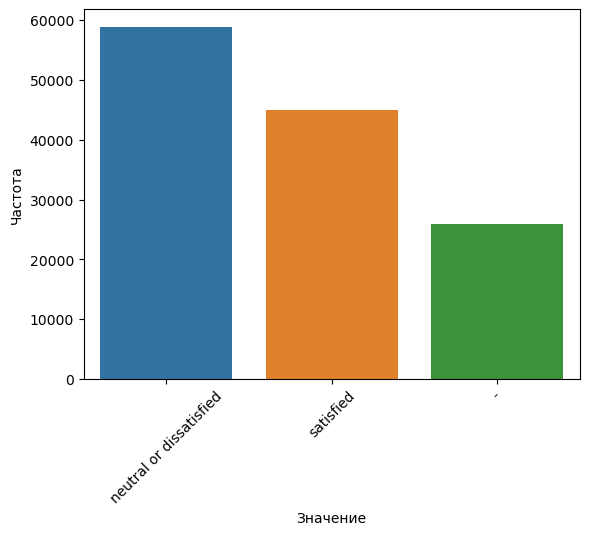

In [5]:
plt.figure()
sns.countplot(data=df, x=df.satisfaction)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

In [6]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
-                          25976
Name: satisfaction, dtype: int64

Избавимся от данных по которым нет информации относительно оценки удволитворенности полетом

In [7]:
df = df[df['satisfaction'] != '-']

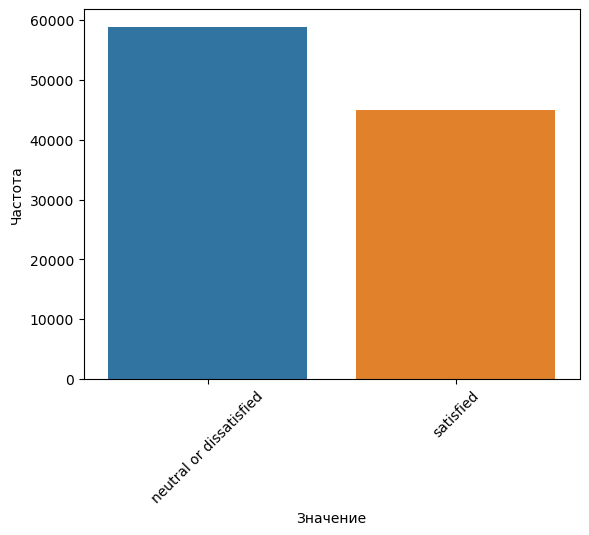

In [8]:
plt.figure()
sns.countplot(data=df, x=df.satisfaction)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

In [9]:
df_dum = pd.get_dummies(df['satisfaction'], prefix='satisfaction', drop_first = True)
df = pd.concat([df, df_dum], axis=1)
df = df.drop(['satisfaction', 'id'], axis=1)

In [10]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction_satisfied
0,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,0
1,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,1
2,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,1
3,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,1
4,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,1


In [11]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class
count,103644,103838,103816,103815
unique,2,2,2,3
top,Female,Loyal Customer,Business travel,Business
freq,52590,84873,71596,49615


In [12]:
df['Gender'].isnull().value_counts(normalize=True)

False    0.997498
True     0.002502
Name: Gender, dtype: float64

In [13]:
df['Customer Type'].isnull().value_counts(normalize=True)

False    0.999365
True     0.000635
Name: Customer Type, dtype: float64

In [14]:
df['Type of Travel'].isnull().value_counts(normalize=True)

False    0.999153
True     0.000847
Name: Type of Travel, dtype: float64

In [15]:
df['Class'].isnull().value_counts(normalize=True)

False    0.999143
True     0.000857
Name: Class, dtype: float64

In [16]:
df[['Gender', 'Customer Type', 'Type of Travel', 'Class']].isnull().value_counts(normalize=True)

Gender  Customer Type  Type of Travel  Class
False   False          False           False    0.995159
True    False          False           False    0.002502
False   False          False           True     0.000857
                       True            False    0.000847
        True           False           False    0.000635
dtype: float64

Довольно мало данных пропущенно в категориальных значениях, их можно отбросить

In [17]:
df.dropna(subset=['Gender', 'Customer Type', 'Type of Travel', 'Class'], inplace=True)


In [18]:
df[['Gender', 'Customer Type', 'Type of Travel', 'Class']].isnull().value_counts(normalize=True)

Gender  Customer Type  Type of Travel  Class
False   False          False           False    1.0
dtype: float64

Далее количественные переменные.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103401 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103401 non-null  object 
 1   Age                                103141 non-null  float64
 2   Customer Type                      103401 non-null  object 
 3   Type of Travel                     103401 non-null  object 
 4   Class                              103401 non-null  object 
 5   Flight Distance                    103329 non-null  float64
 6   Departure Delay in Minutes         103317 non-null  float64
 7   Arrival Delay in Minutes           102997 non-null  float64
 8   Inflight wifi service              103369 non-null  float64
 9   Departure/Arrival time convenient  103360 non-null  float64
 10  Ease of Online booking             103368 non-null  float64
 11  Gate location                      1033

In [20]:
df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction_satisfied
count,103141.000000,103329.000000,103317.000000,102997.000000,103369.000000,103360.000000,103368.000000,103371.000000,103366.000000,103364.000000,103360.000000,103360.000000,103369.000000,103365.000000,103369.000000,103367.000000,103352.000000,103370.000000,103401.000000
mean,40.053742,1326.312158,15.811019,16.774683,2.733702,3.065190,2.760825,2.981755,3.204748,3.255389,3.443121,3.361087,3.386441,3.357026,3.635858,3.308358,3.644767,3.289552,0.433487
std,20.333748,4658.830095,74.031420,109.302611,1.358396,1.554409,1.422609,1.309189,1.352828,1.385806,1.349591,1.360394,1.335088,1.366289,1.227153,1.302204,1.212420,1.344127,0.495559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,40.000000,845.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,1.000000
max,612.000000,379620.000000,11011.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,40.000000,45.000000,40.000000,40.000000,45.000000,36.000000,45.000000,1.000000


In [21]:
df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
                   'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                   'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
                   'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
                   'Inflight service', 'Cleanliness']].isnull().value_counts(normalize=True)

Age    Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  Inflight wifi service  Departure/Arrival time convenient  Ease of Online booking  Gate location  Food and drink  Online boarding  Seat comfort  Inflight entertainment  On-board service  Leg room service  Baggage handling  Checkin service  Inflight service  Cleanliness
False  False            False                       False                     False                  False                              False                   False          False           False            False         False                   False             False             False             False            False             False          0.987273
                                                    True                      False                  False                              False                   False          False           False            False         False                   False             False             False       

не пропущено только в id и satisfaction

заполним средними

In [22]:
mean_values = df.mean()
df_mean = df.fillna(mean_values)
df_mean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 103401 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103401 non-null  object 
 1   Age                                103401 non-null  float64
 2   Customer Type                      103401 non-null  object 
 3   Type of Travel                     103401 non-null  object 
 4   Class                              103401 non-null  object 
 5   Flight Distance                    103401 non-null  float64
 6   Departure Delay in Minutes         103401 non-null  float64
 7   Arrival Delay in Minutes           103401 non-null  float64
 8   Inflight wifi service              103401 non-null  float64
 9   Departure/Arrival time convenient  103401 non-null  float64
 10  Ease of Online booking             103401 non-null  float64
 11  Gate location                      1034

C:\Users\Panic\AppData\Local\Temp\ipykernel_15288\2134289712.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean()


In [23]:
df_mean[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
                   'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                   'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
                   'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
                   'Inflight service', 'Cleanliness']].isnull().value_counts(normalize=True)

Age    Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  Inflight wifi service  Departure/Arrival time convenient  Ease of Online booking  Gate location  Food and drink  Online boarding  Seat comfort  Inflight entertainment  On-board service  Leg room service  Baggage handling  Checkin service  Inflight service  Cleanliness
False  False            False                       False                     False                  False                              False                   False          False           False            False         False                   False             False             False             False            False             False          1.0
dtype: float64

Посмотрим на распределение признаков

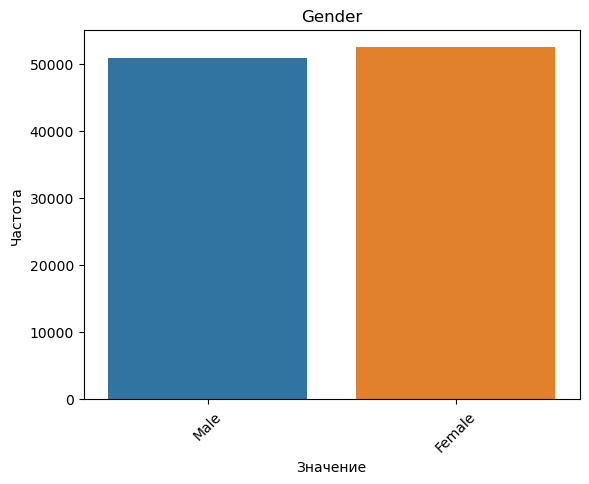

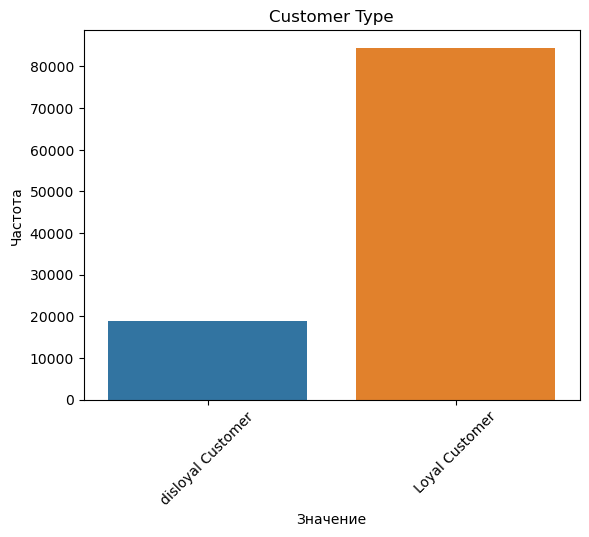

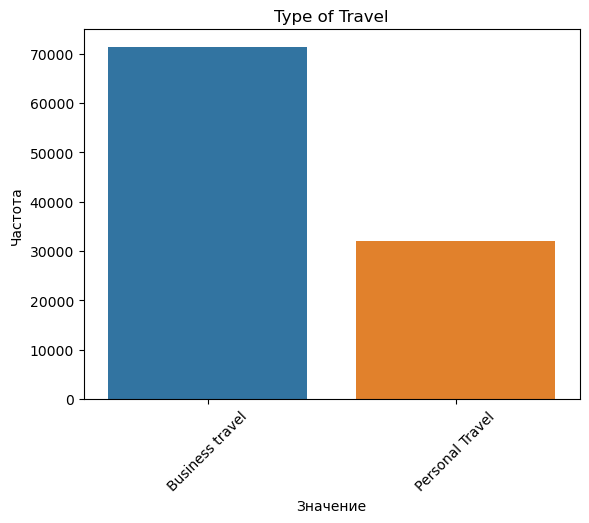

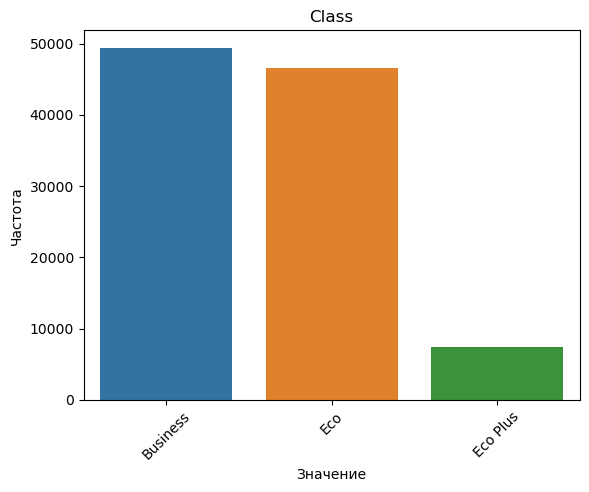

ValueError: Could not interpret input 'satisfaction'

<Figure size 640x480 with 0 Axes>

In [24]:
# Список категориальных признаков
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

# Список числовых признаков
numeric_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
                   'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                   'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
                   'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
                   'Inflight service', 'Cleanliness']

# Построение гистограмм для каждого категориального признака
for column in categorical_columns:
    plt.figure()
    sns.countplot(data=df_mean, x=column)
    plt.title(column)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.xticks(rotation=45)
    plt.show()

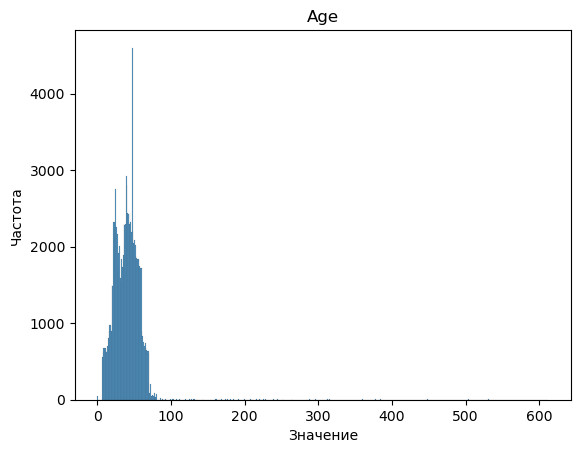

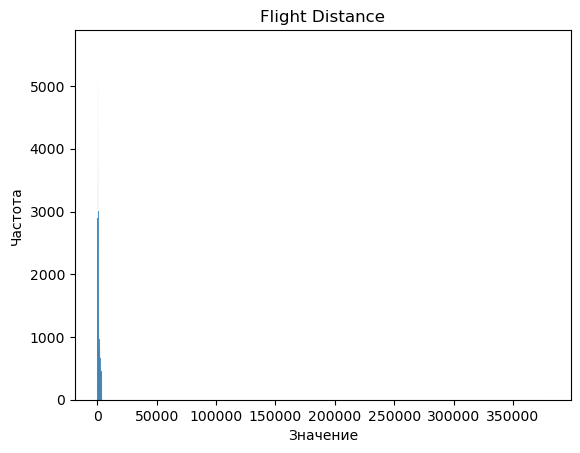

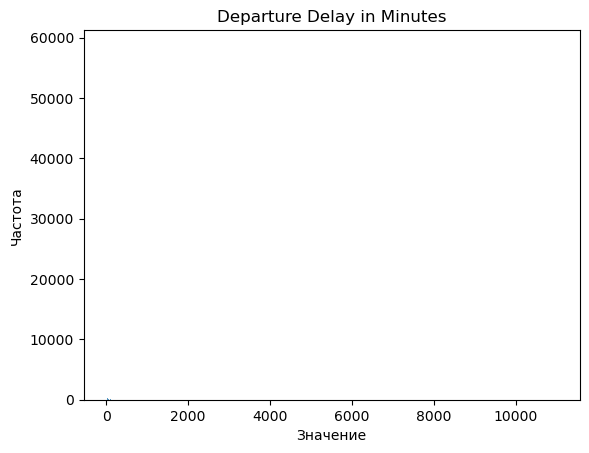

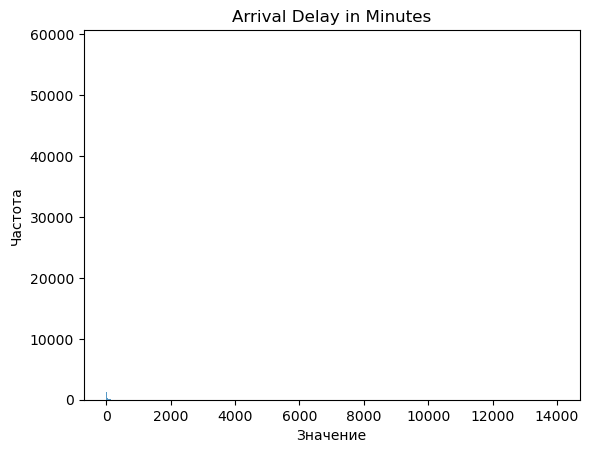

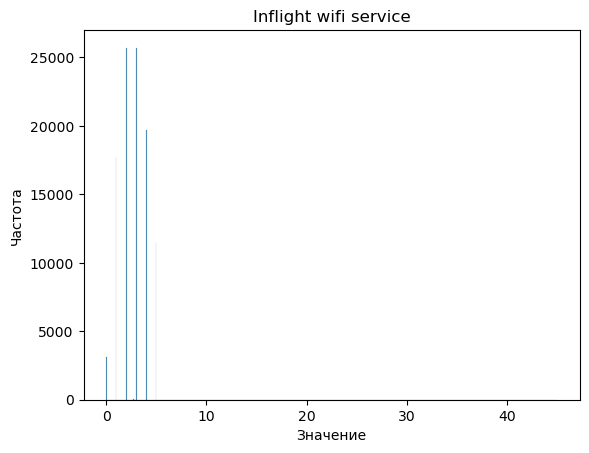

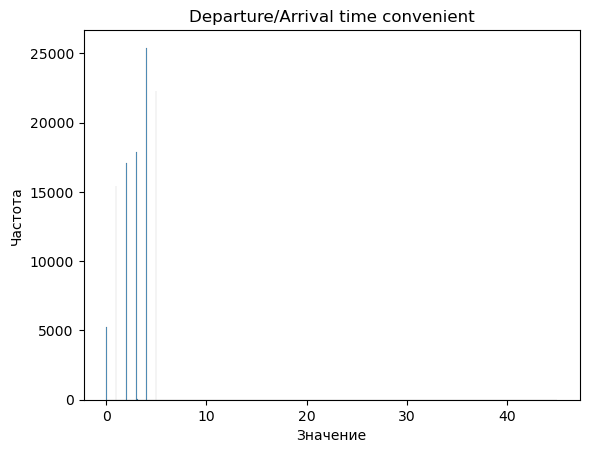

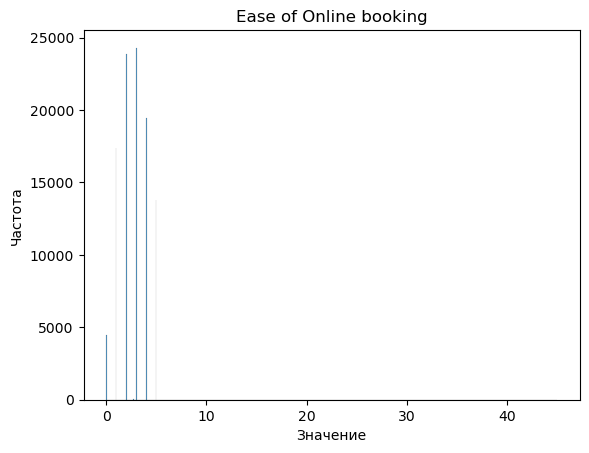

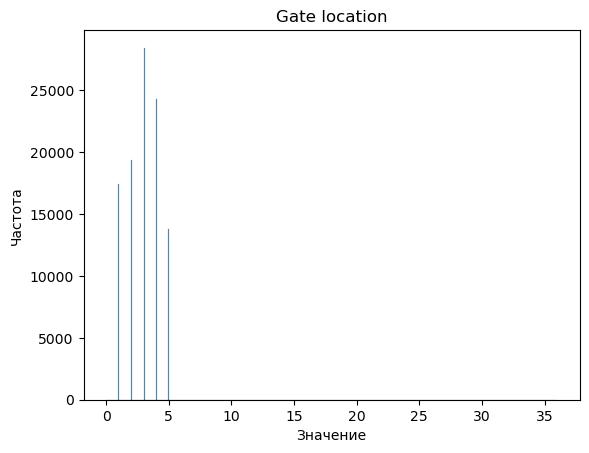

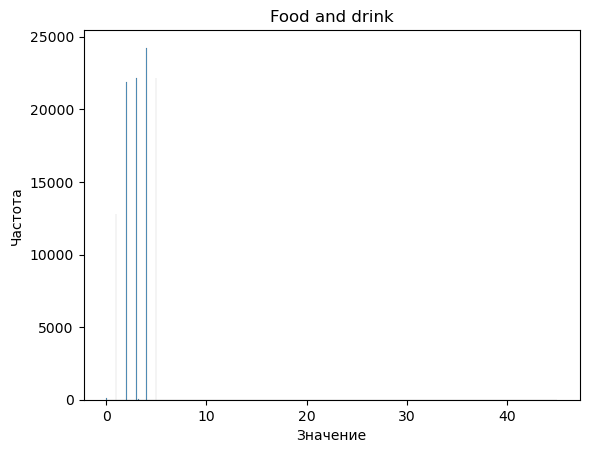

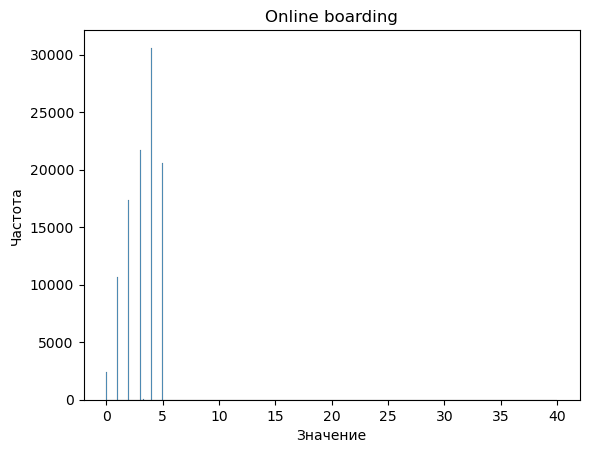

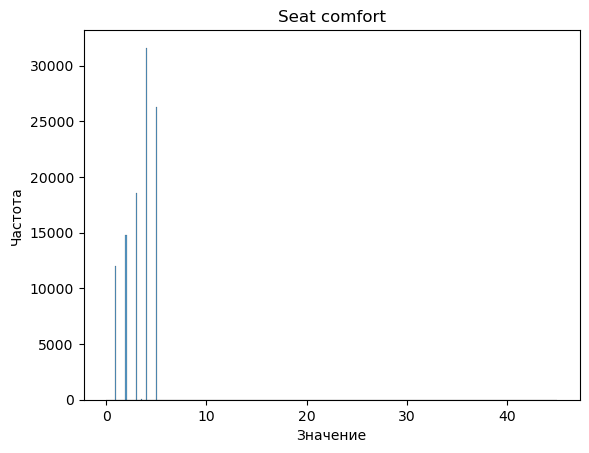

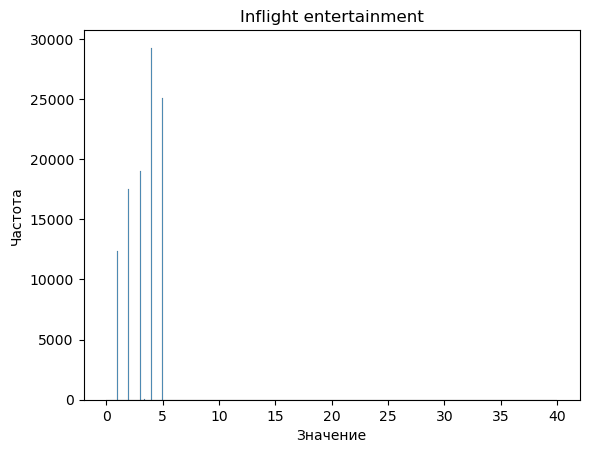

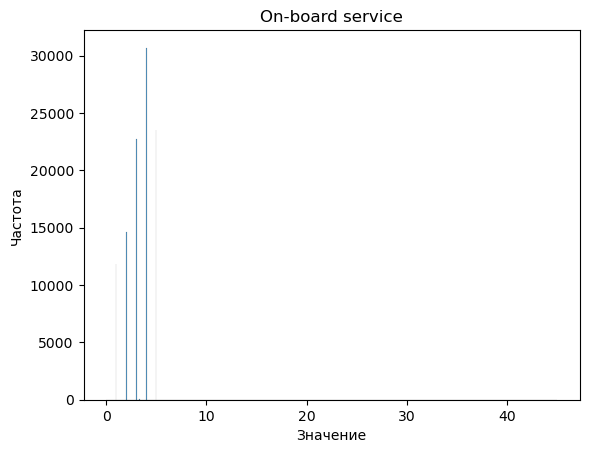

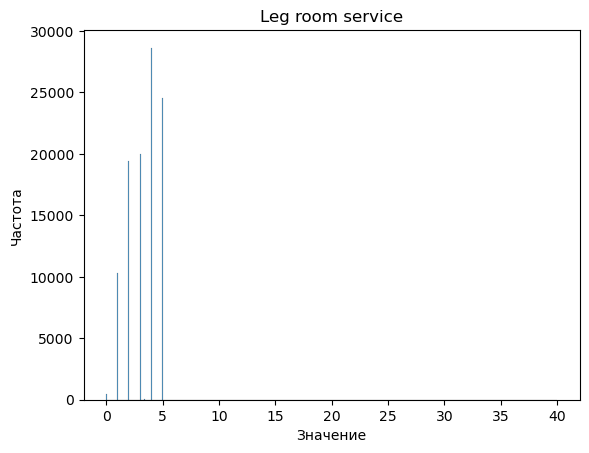

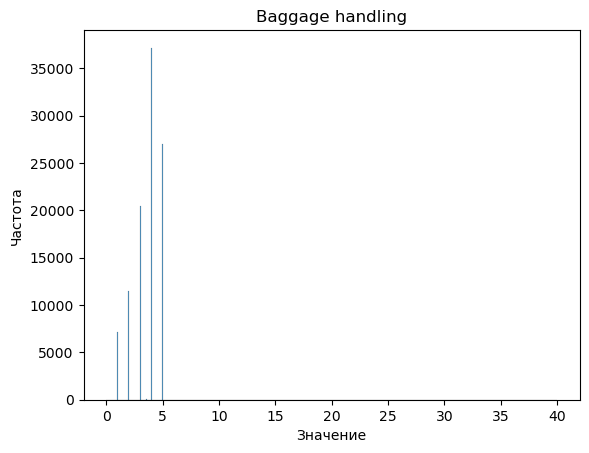

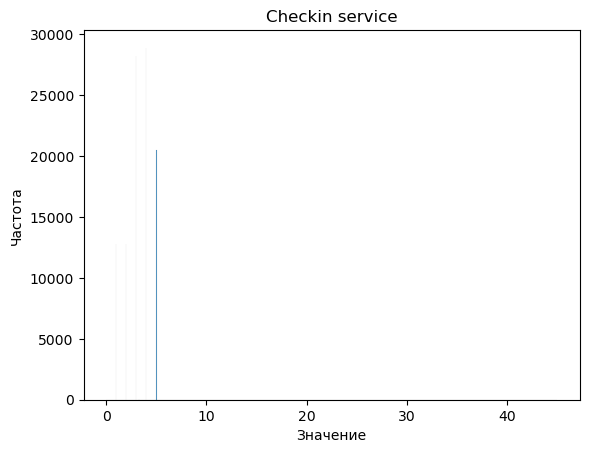

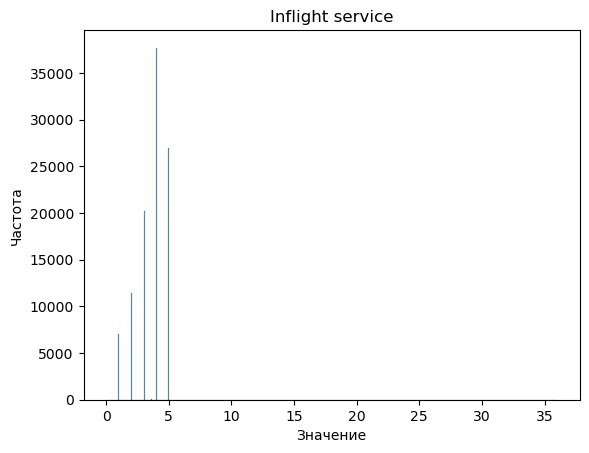

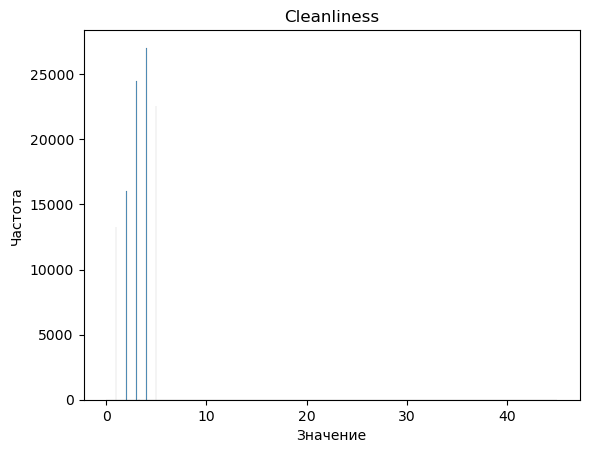

In [25]:
for column in numeric_columns:
    plt.figure()
    sns.histplot(data=df_mean[column])
    plt.title(column)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.show()


посмотрим корреляцию

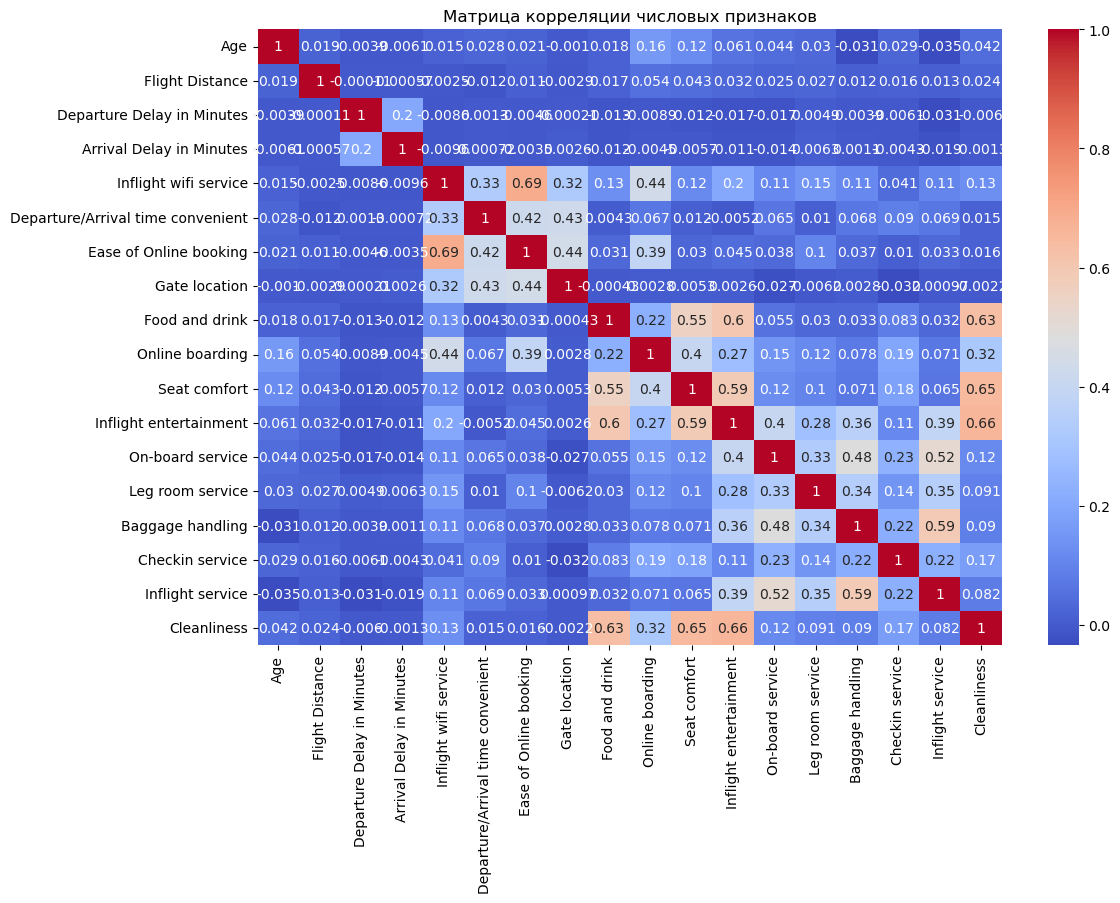

In [26]:
numeric_df = df_mean[numeric_columns]

# Построение матрицы корреляции
correlation_matrix = numeric_df.corr()

# Построение тепловой карты матрицы корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции числовых признаков')
plt.show()


Уберем частоту коррелирующую с 3 оценками, для снижения размерности

In [27]:
df_mean = df_mean.drop(['Cleanliness', 'Food and drink', 'Inflight wifi service','Inflight entertainment','Baggage handling'], axis=1)


In [28]:
numeric_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Departure/Arrival time convenient', 'Ease of Online booking',
                   'Gate location', 'Online boarding', 'Seat comfort', 
                   'On-board service', 'Leg room service', 'Checkin service',
                   'Inflight service']

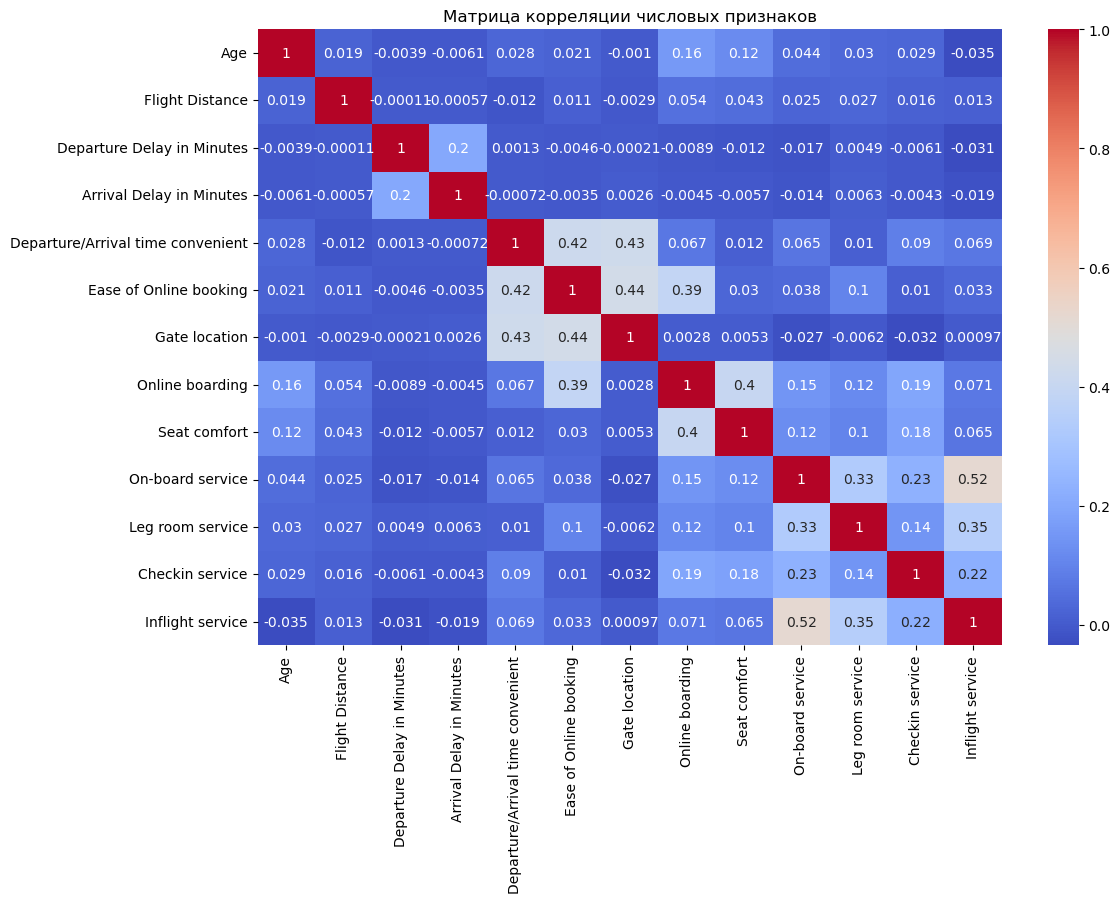

In [29]:
numeric_df = df_mean[numeric_columns]

# Построение матрицы корреляции
correlation_matrix = numeric_df.corr()

# Построение тепловой карты матрицы корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции числовых признаков')
plt.show()

посмотрим на phik критерий

In [30]:
from pandas_profiling import ProfileReport

# https://github.com/KaveIO/PhiK
import phik
from phik.report import plot_correlation_matrix
from phik import report

C:\Users\Panic\anaconda3\envs\torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Panic\AppData\Local\Temp\ipykernel_15288\1945011299.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [31]:
import pandas as pd
from phik import phik_matrix

# Загрузка данных
df = pd.read_csv(DATASET_PATH)

# Выбор двух переменных для расчета Phik-критерия
variable1 = 'Cleanliness'
variable2 = 'satisfaction'

# Вычисление матрицы Phik-критерия
phik_matrix = phik_matrix(df[[variable1, variable2]])

# Вывод значения Phik-критерия
phik_coefficient = phik_matrix.loc[variable1, variable2]
print("Phik-критерий:", phik_coefficient)


interval columns not set, guessing: ['Cleanliness']
Phik-критерий: 0.26052795157076314


In [32]:
numeric_df = df_mean[numeric_columns]
phik_overview = numeric_df.phik_matrix()
phik_overview

interval columns not set, guessing: ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Online boarding', 'Seat comfort', 'On-board service', 'Leg room service', 'Checkin service', 'Inflight service']


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Departure/Arrival time convenient,Ease of Online booking,Gate location,Online boarding,Seat comfort,On-board service,Leg room service,Checkin service,Inflight service
Age,1.000000,0.0,0.000000,0.000000,0.014602,0.012242,0.000000,0.020819,0.015548,0.021632,0.080279,0.007380,0.070355
Flight Distance,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Departure Delay in Minutes,0.000000,0.0,1.000000,0.051483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arrival Delay in Minutes,0.000000,0.0,0.051483,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Departure/Arrival time convenient,0.014602,0.0,0.000000,0.000000,1.000000,0.468050,0.270935,0.021280,0.000000,0.032288,0.000000,0.060566,0.050234
Ease of Online booking,0.012242,0.0,0.000000,0.000000,0.468050,1.000000,0.321703,0.147664,0.000000,0.008982,0.045307,0.000000,0.009375
Gate location,0.000000,0.0,0.000000,0.000000,0.270935,0.321703,1.000000,0.000000,0.000000,0.000000,0.000000,0.009868,0.000000
Online boarding,0.020819,0.0,0.000000,0.000000,0.021280,0.147664,0.000000,1.000000,0.195905,0.144488,0.170688,0.115710,0.123912
Seat comfort,0.015548,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.195905,1.000000,0.063300,0.087563,0.138870,0.077255
On-board service,0.021632,0.0,0.000000,0.000000,0.032288,0.008982,0.000000,0.144488,0.063300,1.000000,0.208049,0.089173,0.316727


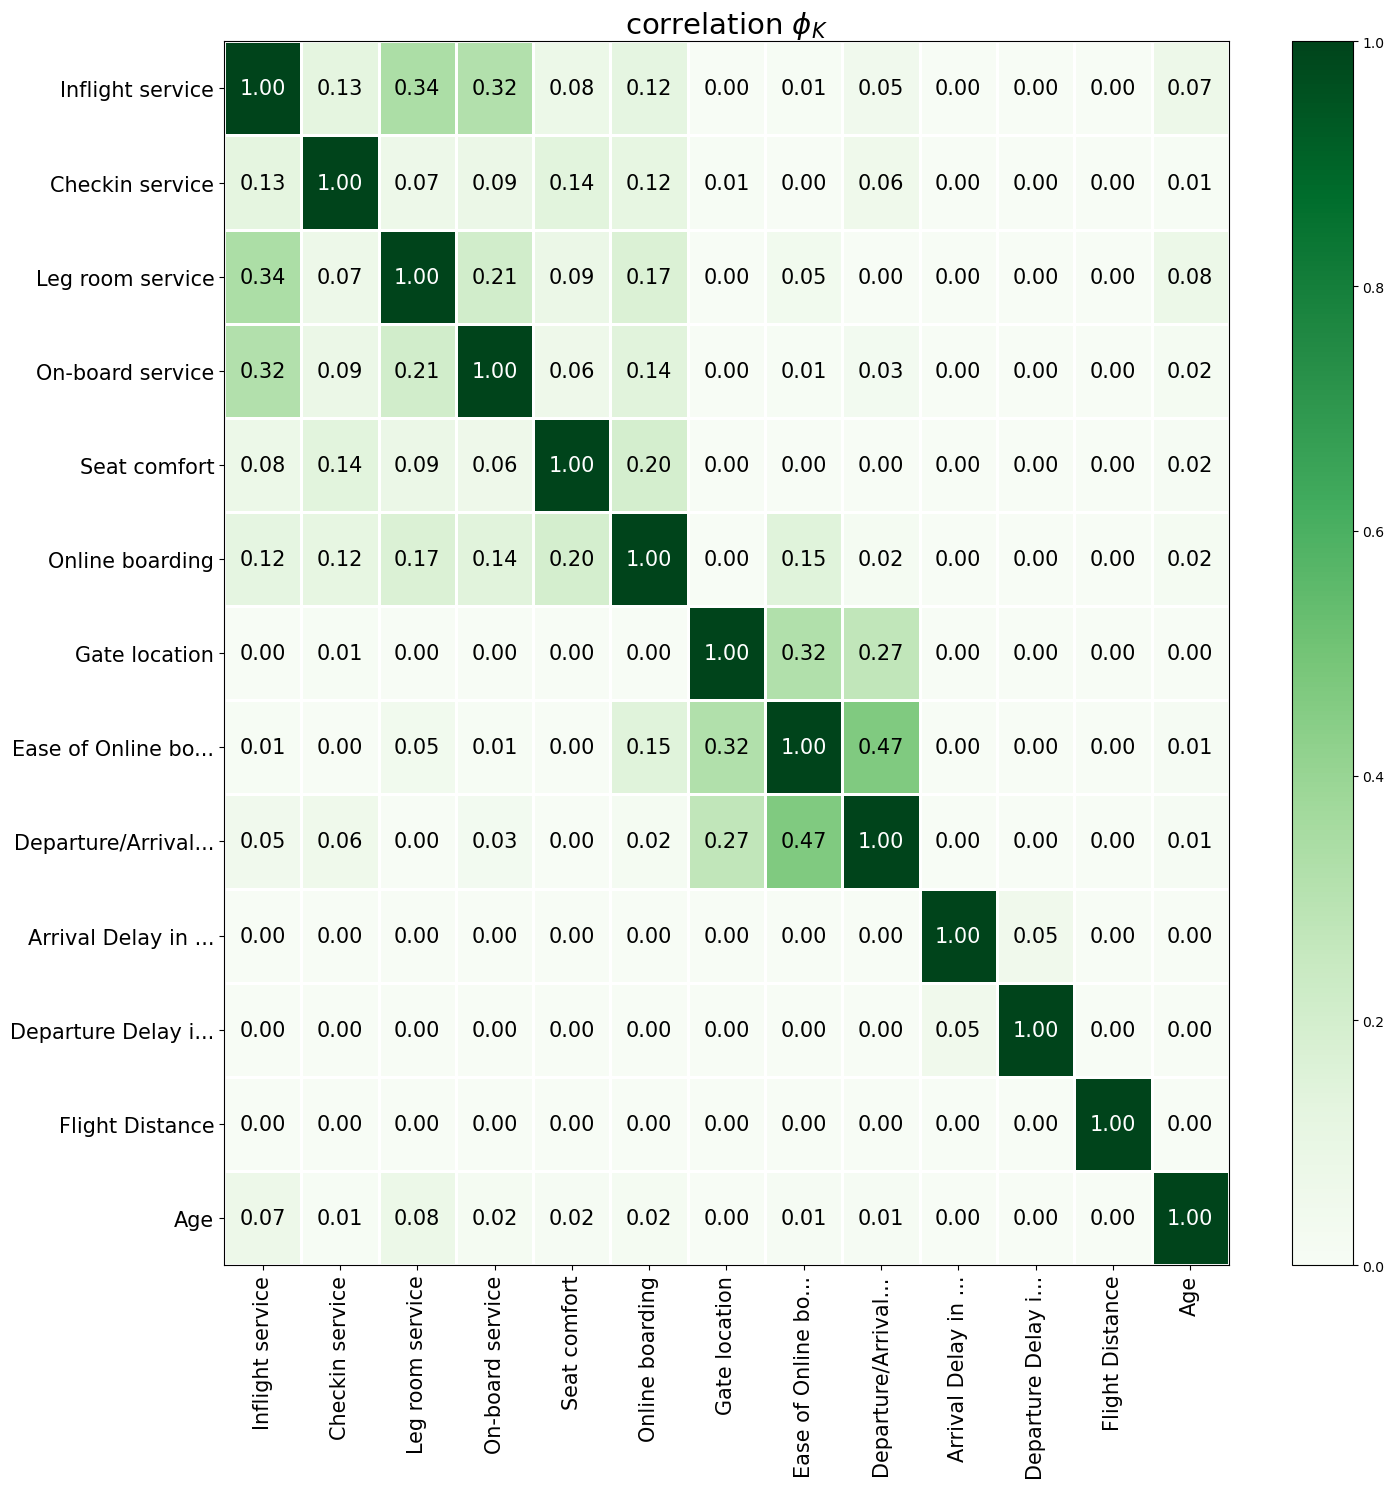

In [33]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(15, 15))
plt.tight_layout()

In [34]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103401 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103401 non-null  object 
 1   Age                                103401 non-null  float64
 2   Customer Type                      103401 non-null  object 
 3   Type of Travel                     103401 non-null  object 
 4   Class                              103401 non-null  object 
 5   Flight Distance                    103401 non-null  float64
 6   Departure Delay in Minutes         103401 non-null  float64
 7   Arrival Delay in Minutes           103401 non-null  float64
 8   Departure/Arrival time convenient  103401 non-null  float64
 9   Ease of Online booking             103401 non-null  float64
 10  Gate location                      103401 non-null  float64
 11  Online boarding                    1034

In [35]:
df_dummies = pd.get_dummies(df_mean['Gender'], prefix='Gender', drop_first = True)
df_mean = pd.concat([df_mean, df_dummies], axis=1)


In [36]:
df_dummies = pd.get_dummies(df_mean['Customer Type'], prefix='Customer_Type', drop_first = True)
df_mean = pd.concat([df_mean, df_dummies], axis=1)

In [37]:
df_dummies = pd.get_dummies(df_mean['Type of Travel'], prefix='Type _of_Travel', drop_first = True)
df_mean = pd.concat([df_mean, df_dummies], axis=1)

In [38]:
df_dummies = pd.get_dummies(df_mean['Class'], prefix='Class')
df_mean = pd.concat([df_mean, df_dummies], axis=1)

In [40]:
df_mean = df_mean.drop(['Gender', 'Customer Type', 'Type of Travel','Class'], axis=1)

In [41]:
df_mean.head(10)

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Departure/Arrival time convenient,Ease of Online booking,Gate location,Online boarding,Seat comfort,On-board service,Leg room service,Checkin service,Inflight service,satisfaction_satisfied,Gender_Male,Customer_Type_disloyal Customer,Type _of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,48.0,821.0,2.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,2.0,4.0,5.0,0,1,1,0,1,0,0
1,35.0,821.0,26.0,39.0,2.0,2.0,2.0,5.0,4.0,5.0,5.0,3.0,5.0,1,0,0,0,1,0,0
2,41.0,853.0,0.0,0.0,4.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0,3.0,1,1,0,0,1,0,0
3,50.0,1905.0,0.0,0.0,2.0,2.0,2.0,4.0,5.0,5.0,5.0,3.0,5.0,1,1,0,0,1,0,0
4,49.0,3470.0,0.0,1.0,3.0,3.0,3.0,5.0,4.0,3.0,4.0,3.0,3.0,1,0,0,0,1,0,0
5,43.0,3788.0,0.0,0.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,3.0,4.0,1,1,0,0,1,0,0
6,43.0,1963.0,0.0,0.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,4.0,5.0,1,1,0,0,1,0,0
7,60.0,853.0,0.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,3.0,1,0,0,0,1,0,0
8,50.0,2607.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,4.0,4.0,3.0,4.0,0,1,0,0,1,0,0
9,38.0,2822.0,13.0,0.0,2.0,5.0,2.0,5.0,4.0,5.0,5.0,3.0,5.0,1,0,0,0,1,0,0


In [42]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103401 entries, 0 to 129879
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103401 non-null  float64
 1   Flight Distance                    103401 non-null  float64
 2   Departure Delay in Minutes         103401 non-null  float64
 3   Arrival Delay in Minutes           103401 non-null  float64
 4   Departure/Arrival time convenient  103401 non-null  float64
 5   Ease of Online booking             103401 non-null  float64
 6   Gate location                      103401 non-null  float64
 7   Online boarding                    103401 non-null  float64
 8   Seat comfort                       103401 non-null  float64
 9   On-board service                   103401 non-null  float64
 10  Leg room service                   103401 non-null  float64
 11  Checkin service                    1034

In [45]:
X = df_mean.drop(['satisfaction_satisfied'], axis=1)

y = df_mean['satisfaction_satisfied'] 

In [46]:
X.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Departure/Arrival time convenient,Ease of Online booking,Gate location,Online boarding,Seat comfort,On-board service,Leg room service,Checkin service,Inflight service,Gender_Male,Customer_Type_disloyal Customer,Type _of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,48.0,821.0,2.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,2.0,4.0,5.0,1,1,0,1,0,0
1,35.0,821.0,26.0,39.0,2.0,2.0,2.0,5.0,4.0,5.0,5.0,3.0,5.0,0,0,0,1,0,0
2,41.0,853.0,0.0,0.0,4.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0,3.0,1,0,0,1,0,0
3,50.0,1905.0,0.0,0.0,2.0,2.0,2.0,4.0,5.0,5.0,5.0,3.0,5.0,1,0,0,1,0,0
4,49.0,3470.0,0.0,1.0,3.0,3.0,3.0,5.0,4.0,3.0,4.0,3.0,3.0,0,0,0,1,0,0


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Создание объекта StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)
print(X_train_scaled.shape, X_test_scaled.shape)
X_train.head()


(77550, 19) (25851, 19)


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Departure/Arrival time convenient,Ease of Online booking,Gate location,Online boarding,Seat comfort,On-board service,Leg room service,Checkin service,Inflight service,Gender_Male,Customer_Type_disloyal Customer,Type _of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0.719536,-0.086971,-0.222462,-0.174255,0.599235,0.170076,-0.747839,-0.184811,0.415457,1.214386,1.193997,1.299282,0.292474,1.017352,-0.471261,1.485485,-0.957201,1.106103,-0.278769
1,-0.155306,-0.209532,-0.222462,-0.174255,1.241779,1.579199,1.537897,1.257622,0.415457,1.214386,1.193997,-0.236043,1.116940,1.017352,-0.471261,-0.673181,1.044712,-0.904075,-0.278769
2,-0.103845,-0.189939,-0.222462,-0.174255,0.599235,0.874637,0.775985,0.536405,0.415457,-0.292625,0.465805,1.299282,-0.531991,-0.982944,-0.471261,-0.673181,1.044712,-0.904075,-0.278769
3,0.976842,-0.101562,-0.138019,-0.174255,-0.685853,-0.534486,-0.747839,1.257622,0.415457,-0.292625,-0.262387,0.531619,-0.531991,-0.982944,-0.471261,-0.673181,1.044712,-0.904075,-0.278769
4,0.410768,-0.236003,-0.222462,-0.174255,-0.685853,-0.534486,-0.747839,0.536405,1.159529,0.460880,0.465805,0.531619,0.292474,1.017352,-0.471261,-0.673181,1.044712,-0.904075,-0.278769


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
f1 = f1_score(y_test, pred)
print("F1-score:", f1)

F1-score: 0.8388103543234807


In [65]:
from sklearn.metrics import roc_auc_score
proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, proba)
print("ROC AUC:", roc_auc)

ROC AUC: 0.919790590803478


In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[13201,  1469],
       [ 2043,  9138]], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.8641445205214499